The main component of this capstone is a research proposal. Using the data set you selected, propose and outline an experiment plan. The plan should consist of three key components:

1. Analysis that highlights your experimental hypothesis.
2. A rollout plan showing how you would implement and rollout the experiment 
3. An evaluation plan showing what constitutes success in this experiment 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings; warnings.simplefilter('ignore')

%matplotlib inline

In [2]:
df = pd.read_csv('201801-citibike-tripdata.csv')

In [3]:
df.head(5)

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender
0,196,2018-01-01 00:01:51,2018-01-01 00:05:07,315,South St & Gouverneur Ln,40.703554,-74.006702,259,South St & Whitehall St,40.701221,-74.012342,18534,Subscriber,1997.0,1
1,207,2018-01-01 00:02:44,2018-01-01 00:06:11,3224,W 13 St & Hudson St,40.739974,-74.005139,470,W 20 St & 8 Ave,40.743453,-74.000040,19651,Subscriber,1978.0,1
2,613,2018-01-01 00:03:15,2018-01-01 00:13:28,386,Centre St & Worth St,40.714948,-74.002345,2008,Little West St & 1 Pl,40.705693,-74.016777,21678,Subscriber,1982.0,1
3,375,2018-01-01 00:06:44,2018-01-01 00:12:59,466,W 25 St & 6 Ave,40.743954,-73.991449,325,E 19 St & 3 Ave,40.736245,-73.984738,29822,Subscriber,1982.0,1
4,402,2018-01-01 00:06:57,2018-01-01 00:13:40,438,St Marks Pl & 1 Ave,40.727791,-73.985649,380,W 4 St & 7 Ave S,40.734011,-74.002939,30722,Subscriber,1989.0,1


# EXPLORATION

"Citi Bike is a privately owned public bicycle sharing system serving the New York City boroughs of Manhattan, Queens, and Brooklyn, as well as Jersey City, New Jersey." (https://en.wikipedia.org/wiki/Citi_Bike).

The company has been quite successful since its May 2013 opening, expanding from 332 stations and 6,000 bikes to 706 stations and 12,000 bikes as of October 2017.

The dataset I'm using, from January 2018, reflects these numbers relatively closely.

In [4]:
print('Number of Bikes:    ', df.bikeid.nunique())
print('Number of Stations: ', df['start station id'].nunique())

Number of Bikes:     10448
Number of Stations:  763


To put things simply, Citi Bike's success is based on how frequently and how long its bikes are ridden. 

__The purpose of this experiment is to see if improvements to certain bikes will increase the frequency and/or duration that they are ridden, thus increasing profits.__

As a secondary metric, we can see if an increase in total Citi Bike rides has a resulting impact on other local means of transportation such as taxis or ride sharing. 

These changes can benefit the company and potentially benefit the environment if more bikes are being used as opposed to polluting transportation methods.

There are two categories of riders in this database in terms of payment styles, 'Customer' and 'Subscriber'. In the case of this experiment, I have decided to only take into account the riding habits of 'Customers'. The reasoning is as follows:

Subscribers pay an annual membership fee of \\$169/year and get unlimited rides up to 45 minutes each, with a charge of \\$2.50 per each additional 15 minutes over 45. 

Customers typically opt for a single ride at \\$3/ride up to 30mins, or a day pass at \\$12/day for unlimited rides for a 24-hour period, with a charge of \\$4 per each additional 15 minutes over 30.

This means that for most cases, trip frequency and duration do not matter when it comes to Subscribers.

Only 3653 Subscriber trips out of 696894 recorded in this dataset exceeded 45 minutes.

Meanwhile, 7677 Customer trips out of 22090 recorded exceeded 30 minutes, which is a far greater ratio than that of the Subscribers.

As we can see, customer trips that exceed duration outnumber that of subscribers even though there are far greater subscriber trips in total.

In [5]:
dfs = df[df.usertype == 'Subscriber']
dfsx = dfs[dfs.tripduration > 2700]
print('Subscriber Trips Exceeding 45min: ', len(dfsx.index))
print()
dfc = df[df.usertype == 'Customer']
dfcx = dfc[dfc.tripduration > 1500]
print('Customer Trips Exceeding 30min: ', len(dfcx.index))
print()
print('Total Trips by User Type: \n', df.usertype.value_counts())

Subscriber Trips Exceeding 45min:  3653

Customer Trips Exceeding 30min:  7677

Total Trips by User Type: 
 Subscriber    696894
Customer       22090
Name: usertype, dtype: int64


This may be surprising, but there must be reasons for this.

Subscribers likely use Citi Bikes for commuting, meaning they have fixed routes every trip.

Customers, on the other hand, are likely more often renting the bikes for fun/tourism since they are visiting the city, meaning they are more likely to go on longer rides throughout the city. 

This theory is reinforced by the following:

In [6]:
print('Mean Subscriber Trip Duration: ', df[df['usertype'] == 'Subscriber'].tripduration.mean())
print('Mean Customer Trip Duration:  ', df[df['usertype'] == 'Customer'].tripduration.mean())

Mean Subscriber Trip Duration:  690.7522004781215
Mean Customer Trip Duration:   2177.9059755545495


The point is, our end goal of increasing trip frequency and duration applies only to Citi Bike customers.

# EXPERIMENTATION

Now, onto the experiment:

Here are some potential upgrades that can be added onto certain bikes.

POSSIBLE UPGRADES:

1. Smart Halo - This gadget turns bikes into smartbikes. Guides you around via GPS, __tracks your fitness goals__, has an automatic night light and even has a personal assistant that can answer wuestions or take phone calls. I believe the fitness tracking aspect alone will lead to longer and/or more frequent rides.

2. Attached Bluetooth Speaker (any) - This will increase enjoyment on bike rides, especially for those without headphones or other means of listening to music while riding. Could potentially increase duration of bike rides.
|
3. Improved Seat Cushion (any) - A more comfortable seat can definitely increase trip duration. From my own experience, Citi Bike seats are not the most comfortable and can leade to shorter trips when being ridden for leisure/tourism purposes.

For the sake of simplicity for this experiment, we will be choosing just one upgrate to fit to the bikes.

In order to determine which upgrade to use, it would be a good idea to learn a little more about our customers. 

The most important factor would be age, but gender may matter if there is a large enough discrepency.

In [7]:
# make database of customers only
df_c = df[df.usertype == 'Customer']

In [8]:
print('Mean Customer Age: ', 2019 - df_c['birth year'].mean())
df_c_m = df_c[df.gender == 1]
print('Mean Male Customer Age: ', 2019 - df_c_m['birth year'].mean())
df_c_f = df_c[df.gender == 2]
print('Mean Female Customer Age: ', 2019 - df_c_f['birth year'].mean())

Mean Customer Age:  35.016081000595705
Mean Male Customer Age:  35.712607944732326
Mean Female Customer Age:  33.81972789115639


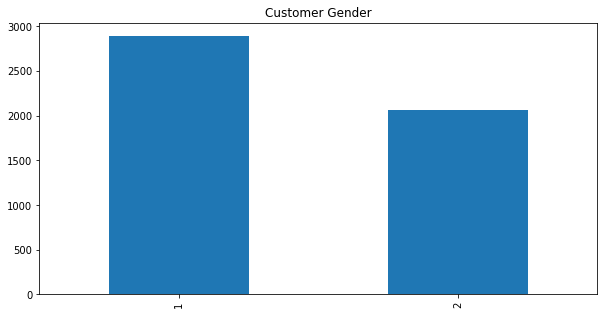

In [9]:
# remove 'unknown' genders
df_c_mf = df_c[df_c.gender != 0]
df_c_mf.gender.value_counts().plot(kind='bar', figsize=(10,5), linewidth=1, title='Customer Gender')

In [10]:
print('Male/Female Ratio: ', len(df_c[df_c.gender == 1]) / len(df_c[df_c.gender == 2]))

Male/Female Ratio:  1.4067055393586005


As we can see, the mean customer age is about 35yrs, with only slight variation by age.

There are more male than female customers at a 1.4 ratio, but I do not believe that is significant enough to factor into upgrade choice.

Based on these factors, we will go with the Smart Halo attachment.

If the average age was a bit older, say, 40-50yrs+, I would have opted for a different upgrade, since that demographic would be less likely to know how or care to utilize the technology.

The bluetooth speaker was considered, but it doesn't have as many uses as the Smart Halo, and many customers in their 30s have their own means of listening to music on the go. 

I believe the Smart Halo is the perfect upgrade for this demographic, since they are young enough to be in touch with technology and likely have a general interest in fitness & fitness goals. This will in theory lead to longer and more frequent rides.

# ROLLOUT PLAN

Upgrades will be added to select bikes throughout the city, equally distributed.

For a 1-month experiment:

Ideally, 10% of bikes will be modified for the first two weeks, then up to 50% for the next two weeks.

In terms of tracking the data, a column will be added to determine whether a certain bikeid has been modified, and a column will be added to track revenue of each trip, assuming each trip is a single ride (for simplicity & lack of specification within data) and accounting for overage penalties. This implementation is demonstrated below:

In [11]:
# PRICING FUNCTION
# #1
# Each trip assumed to be single ride = $3
# Every 15min over 30min is +4

def revenue(d):
    x = d.tripduration
    if (x > 1800):
        x = int((x - 1800) / 900)
        y = x * 4 + 3
    else: 
        y = 3
    return y

df_c_c = df_c
df_c_c['revenue'] = df_c.apply(revenue, axis=1)

df_c_c[20:25]

,tripduration,starttime,stoptime,start station id,start station name,start station latitude,start station longitude,end station id,end station name,end station latitude,end station longitude,bikeid,usertype,birth year,gender,revenue
1070,1609,2018-01-01 10:49:22,2018-01-01 11:16:11,3146,E 81 St & 3 Ave,40.775730,-73.956753,3162,W 78 St & Broadway,40.783400,-73.980931,17996,Customer,NaN,0,3
1092,1544,2018-01-01 10:53:42,2018-01-01 11:19:27,3057,Kosciuszko St & Tompkins Ave,40.691283,-73.945242,343,Clinton Ave & Flushing Ave,40.697940,-73.969868,31421,Customer,1989.0,2,3
1128,18295,2018-01-01 11:01:37,2018-01-01 16:06:33,274,Lafayette Ave & Fort Greene Pl,40.686919,-73.976682,3417,Baltic St & 5 Ave,40.679577,-73.978550,25539,Customer,1978.0,1,75
1210,617,2018-01-01 11:17:22,2018-01-01 11:27:39,295,Pike St & E Broadway,40.714067,-73.992939,279,Peck Slip & Front St,40.707873,-74.001670,17162,Customer,NaN,0,3
1248,1026,2018-01-01 11:25:19,2018-01-01 11:42:25,257,Lispenard St & Broadway,40.719392,-74.002472,330,Reade St & Broadway,40.714505,-74.005628,32245,Customer,NaN,0,3


In order to avoid bias, past trends will need to be evaluated. For example, here is some pieces of information from this month:

In [12]:
# GROUP BY DAY
# ADD DAY COLUMN
df_c.starttime = pd.to_datetime(df_c.starttime)
df_c['day'] = df_c.starttime.apply(lambda x: x.strftime("%d"))

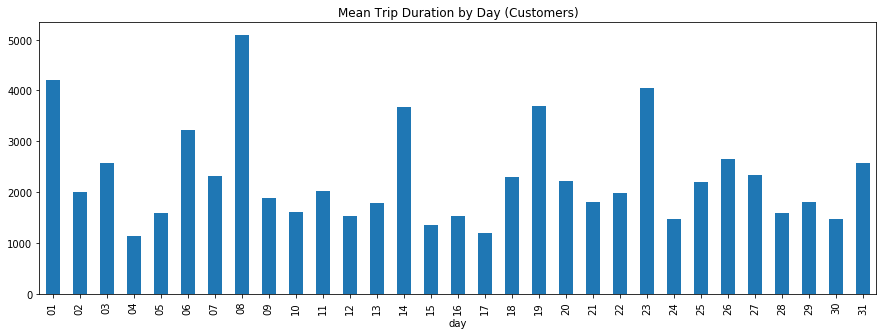

In [13]:
df_c.groupby(['day']).tripduration.mean().plot(kind='bar', figsize=(15,5), linewidth=1, title='Mean Trip Duration by Day (Customers)')

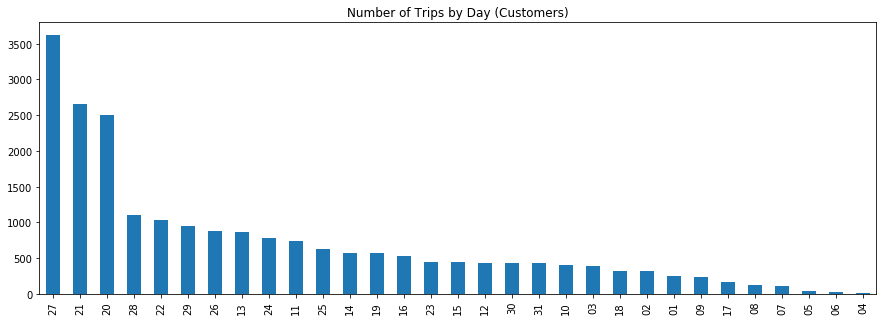

In [14]:
df_c.day.value_counts().plot(kind='bar', figsize=(15,5), linewidth=1, title='Number of Trips by Day (Customers)')

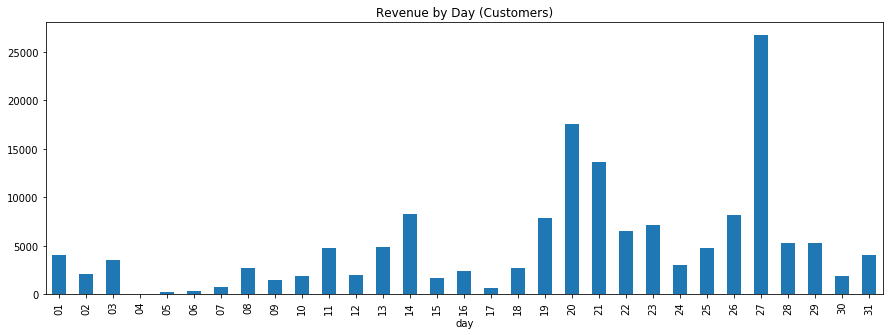

In [15]:
df_c.groupby(['day']).revenue.sum().plot(kind='bar', figsize=(15,5), linewidth=1, title='Revenue by Day (Customers)')

As we can see, while average trip duration remained fairly constant, revenue generated by customers seems to have increased during the second half of the month due to increased trip frequency. This phenomenon is worth looking into more closely to find out what caused it and whether it could be a factor in the experimentation month that could add a bias.

# SUCCESS METRICS

An additional pricing strategy may be implemented as well.

Bikes fitted with the smart devices can be given 'premium' pricing. One of three things will result from this model based on how customers respond.

1. Customers won't be willing to spend the extra money for the upgraded bikes. Upgraded bikes will generate significantly less revenue than the normal bikes.

2. Enough customers will opt for the upgrated bikes to generate about the same revenue as the normal bikes. Break even.

3. Many customers are willing to spend extra for the upgraded bikes. Upgraded bikes will generate significantly more revenue than the normal bikes.

Obviously, outcome 3 would mean the experiment was a success. However, in the case of outcome 2, it could be worth continuing the experiment for an additional week/month to see if the upgraded bikes' success sways in either direction.

At the end of the experimentation period, revenue generated by modified vs unmodified bikes (daily, weekly, etc) will be compared with a T-test.

A P-value greater than .05 will show that there is a significant increase in revenue generated by upgraded bikes.

Lastly, following the experiment, it could be worth collecting data from other transportation services and comparing it to our data over the same period. If we are able to show a relationship between the increase in upgraded bikes and a decrease in use of other forms of public transportation such as busses, taxis, ride shares or other motor vehicles, we can conclude that the experiment had a positive effect on the environment.

# REFERENCES

Dataset: https://data.world/citibikenyc/citibike-tripdata-january-2018

Citi Bike Specs: https://www.citibikenyc.com/how-it-works/meet-the-bike

Citi Bike Pricing: https://www.citibikenyc.com/pricing

Smart Halo: https://www.amazon.com/SmartHalo-Accessory-Navigation-Anti-Theft-Speedometer/dp/B071WMZFFZ/ref=as_li_ss_tl?ie=UTF8&linkCode=sl1&tag=travgadg-20&linkId=a7a40618b96e6ab2ff2f2b472a2ec804&language=en_US

Bluetooth Speaker Example: https://www.amazon.com/Bluetooth-Speaker-System-Celtic-Blu/dp/B01LY6UKCL/ref=as_li_ss_tl?ie=UTF8&linkCode=sl1&tag=travgadg-20&linkId=2974c6a27ad05e05612d2a99839fa8fa&language=en_US

Seat Cushion Example: https://www.amazon.com/Zacro-Cover-BS031-Extra-Bicycle/dp/B01H71AZ36/ref=as_li_ss_tl?ie=UTF8&qid=1522178670&sr=8-19&keywords=bike+accessories&linkCode=sl1&tag=brobible-20&linkId=429446966a8fec33e28c7bb14ccb2eef